## Admissions Table

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [95]:
%matplotlib notebook

In [96]:
df_adm = pd.read_csv('/Users/harnoor_dhingra/Desktop/Project RL Sepsis/Datasets/Mimic/Working/mimic-iii-clinical-database-1.4/ADMISSIONS.csv')

In [97]:
df_adm.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [98]:
len(df_adm)

58976

In [99]:
df_adm.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA'],
      dtype='object')

<IPython.core.display.Javascript object>


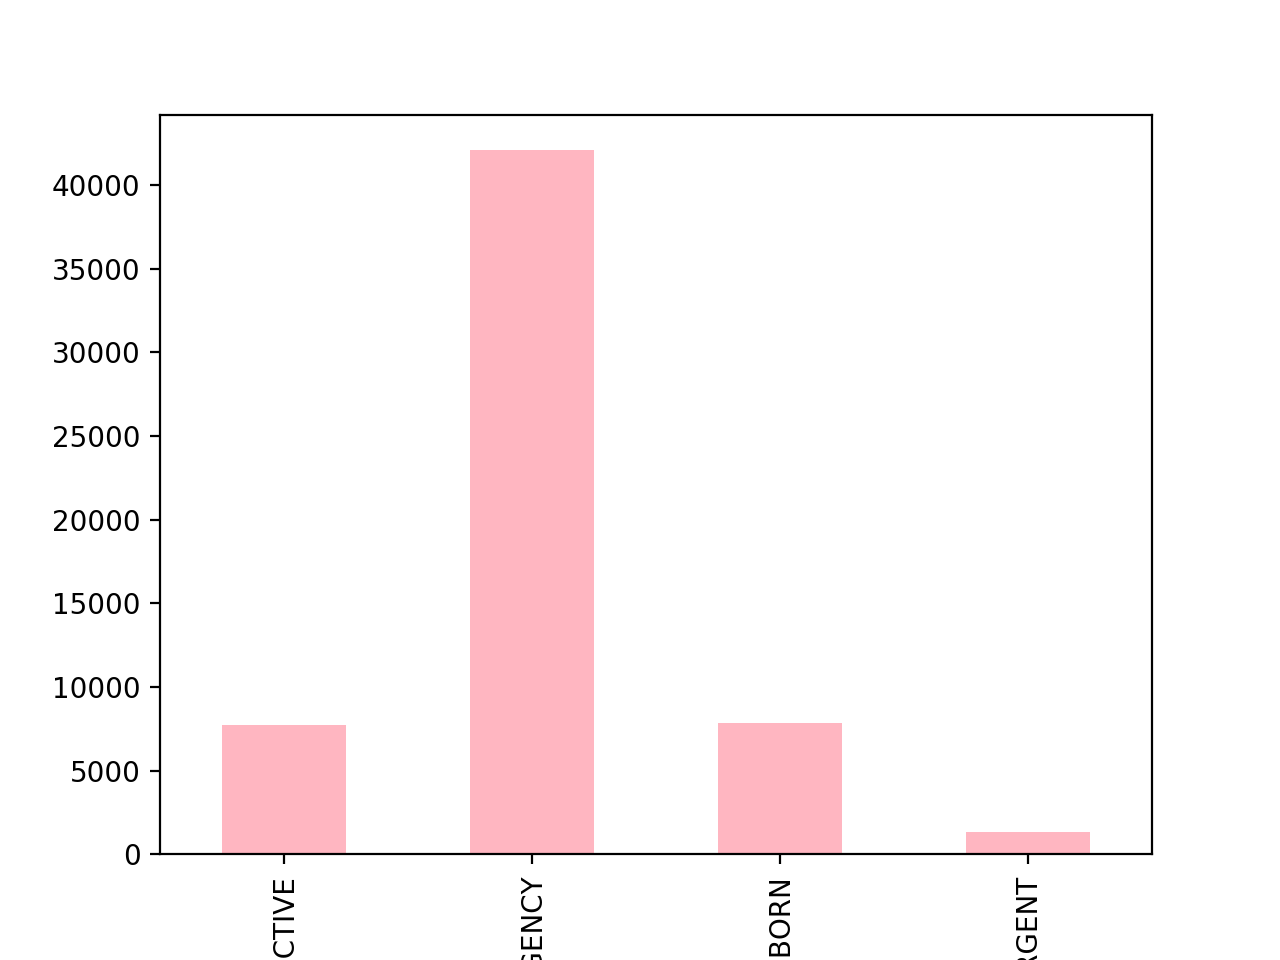

In [131]:
fig = plt.figure()
df_adm.groupby(['ADMISSION_TYPE']).size().plot.bar(color = 'lightpink')

In [101]:
df_adm.ADMITTIME = pd.to_datetime(df_adm.ADMITTIME, format = '%Y-%m-%d %H:%M:%S')
df_adm.DISCHTIME = pd.to_datetime(df_adm.DISCHTIME, format = '%Y-%m-%d %H:%M:%S')
df_adm.DEATHTIME = pd.to_datetime(df_adm.DEATHTIME, format = '%Y-%m-%d %H:%M:%S')

In [102]:
print('NULL date entries in admission column:', df_adm.ADMITTIME.isnull().sum())
print('NULL date entries in discharge column:', df_adm.DISCHTIME.isnull().sum())
# print('NULL date entries in death column:', df_adm.DEATHTIME.isnull().sum())

NULL date entries in admission column: 0
NULL date entries in discharge column: 0


In [103]:
df_adm = df_adm.sort_values(['SUBJECT_ID','ADMITTIME'])
df_adm = df_adm.reset_index(drop = True)

In [104]:
df_adm.loc[df_adm.SUBJECT_ID == 801, ['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE']]

,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE
987,801,2197-06-19 19:47:00,EMERGENCY
988,801,2197-08-09 21:00:00,EMERGENCY
989,801,2198-07-09 23:22:00,EMERGENCY


In [105]:
df_adm['NEXT_ADMITTIME'] = df_adm.groupby('SUBJECT_ID').ADMITTIME.shift(-1)

In [106]:
df_adm['NEXT_ADMISSION_TYPE'] = df_adm.groupby('SUBJECT_ID').ADMISSION_TYPE.shift(-1)

In [107]:
df_adm.loc[df_adm.SUBJECT_ID == 801,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']]

,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
987,801,2197-06-19 19:47:00,EMERGENCY,2197-08-09 21:00:00,EMERGENCY
988,801,2197-08-09 21:00:00,EMERGENCY,2198-07-09 23:22:00,EMERGENCY
989,801,2198-07-09 23:22:00,EMERGENCY,NaT,NaN


In [108]:
rows = df_adm.NEXT_ADMISSION_TYPE == 'ELECTIVE'
df_adm.loc[rows,'NEXT_ADMITTIME'] = pd.NaT
df_adm.loc[rows,'NEXT_ADMISSION_TYPE'] = np.NaN

In [109]:
df_adm.loc[df_adm.SUBJECT_ID == 801,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']]

,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
987,801,2197-06-19 19:47:00,EMERGENCY,2197-08-09 21:00:00,EMERGENCY
988,801,2197-08-09 21:00:00,EMERGENCY,2198-07-09 23:22:00,EMERGENCY
989,801,2198-07-09 23:22:00,EMERGENCY,NaT,NaN


In [110]:
df_adm = df_adm.sort_values(['SUBJECT_ID','ADMITTIME'])

In [111]:
df_adm[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']] = df_adm.groupby(['SUBJECT_ID'])\
[['NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']].fillna(method = 'bfill')

In [112]:
df_adm.loc[df_adm.SUBJECT_ID == 801,['SUBJECT_ID','ADMITTIME','ADMISSION_TYPE','NEXT_ADMITTIME','NEXT_ADMISSION_TYPE']]

,SUBJECT_ID,ADMITTIME,ADMISSION_TYPE,NEXT_ADMITTIME,NEXT_ADMISSION_TYPE
987,801,2197-06-19 19:47:00,EMERGENCY,2197-08-09 21:00:00,EMERGENCY
988,801,2197-08-09 21:00:00,EMERGENCY,2198-07-09 23:22:00,EMERGENCY
989,801,2198-07-09 23:22:00,EMERGENCY,NaT,NaN


<IPython.core.display.Javascript object>


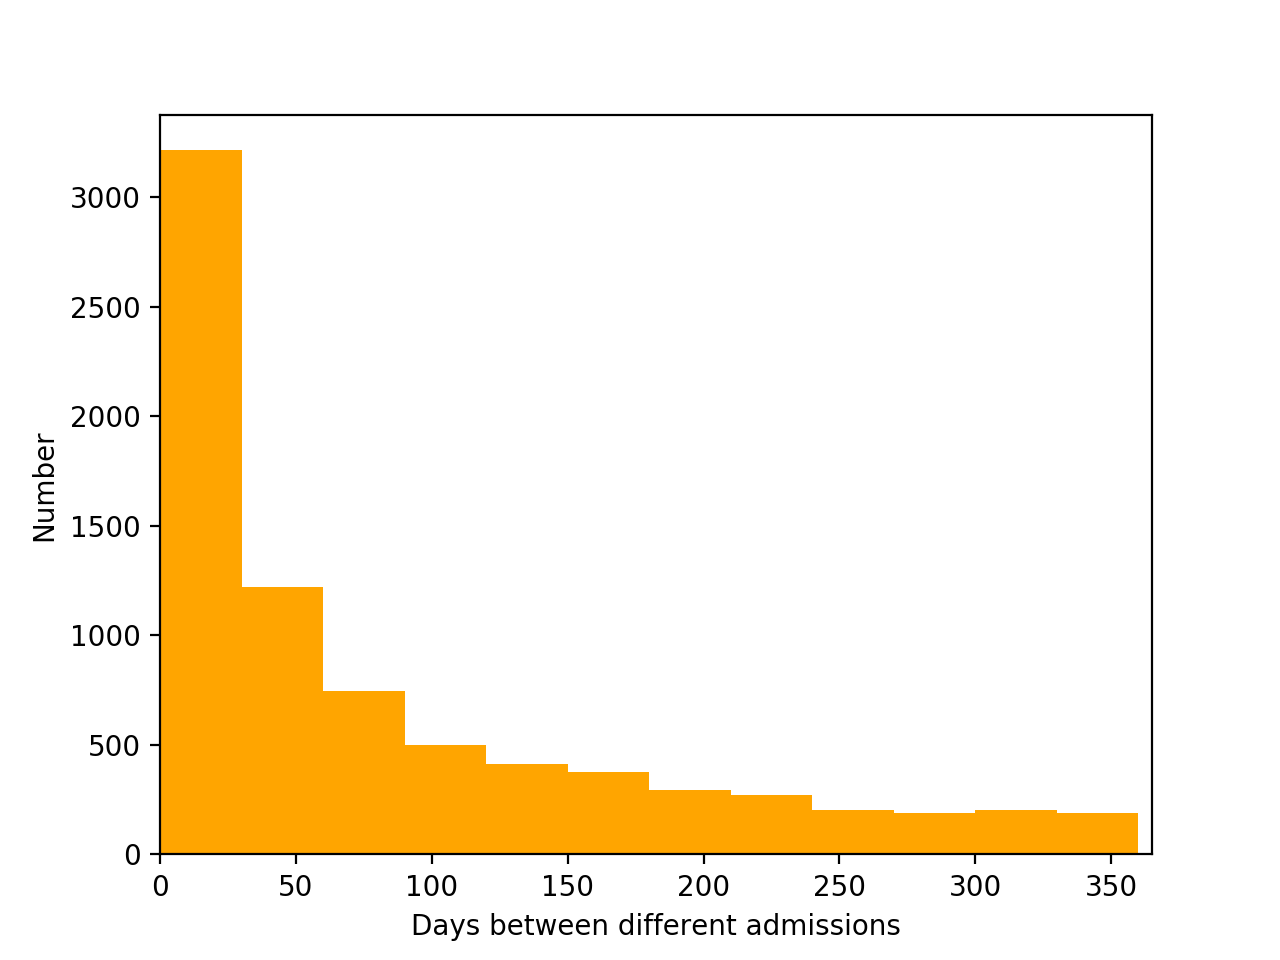

In [130]:
fig = plt.figure() 
df_adm['DAYS_NEXT_ADMIT']=  (df_adm.NEXT_ADMITTIME - df_adm.DISCHTIME).dt.total_seconds()/(24*60*60)
plt.hist(df_adm.loc[~df_adm.DAYS_NEXT_ADMIT.isnull(),'DAYS_NEXT_ADMIT'], bins = range(0,365,30), color = 'orange')
plt.xlim([0,365])
plt.xlabel('Days between different admissions')
plt.ylabel('Number')
plt.show()

In [127]:
print('Number with a readmission:', (~df_adm.DAYS_NEXT_ADMIT.isnull()).sum())
print('Total Number:', len(df_adm))

Number with a readmission: 11399
Total Number: 58976


## Notes Table

In [122]:
df_notes = pd.read_csv("/Users/harnoor_dhingra/Desktop/Project RL Sepsis/Datasets/Mimic/Working/mimic-iii-clinical-database-1.4/NOTEEVENTS.csv")

/Users/harnoor_dhingra/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [123]:
print('Number of notes:',len(df_notes))

Number of notes: 2083180


In [124]:
df_notes.CATEGORY.unique()

array(['Discharge summary', 'Echo', 'ECG', 'Nursing', 'Physician ',
       'Rehab Services', 'Case Management ', 'Respiratory ', 'Nutrition',
       'General', 'Social Work', 'Pharmacy', 'Consult', 'Radiology',
       'Nursing/other'], dtype=object)

<IPython.core.display.Javascript object>


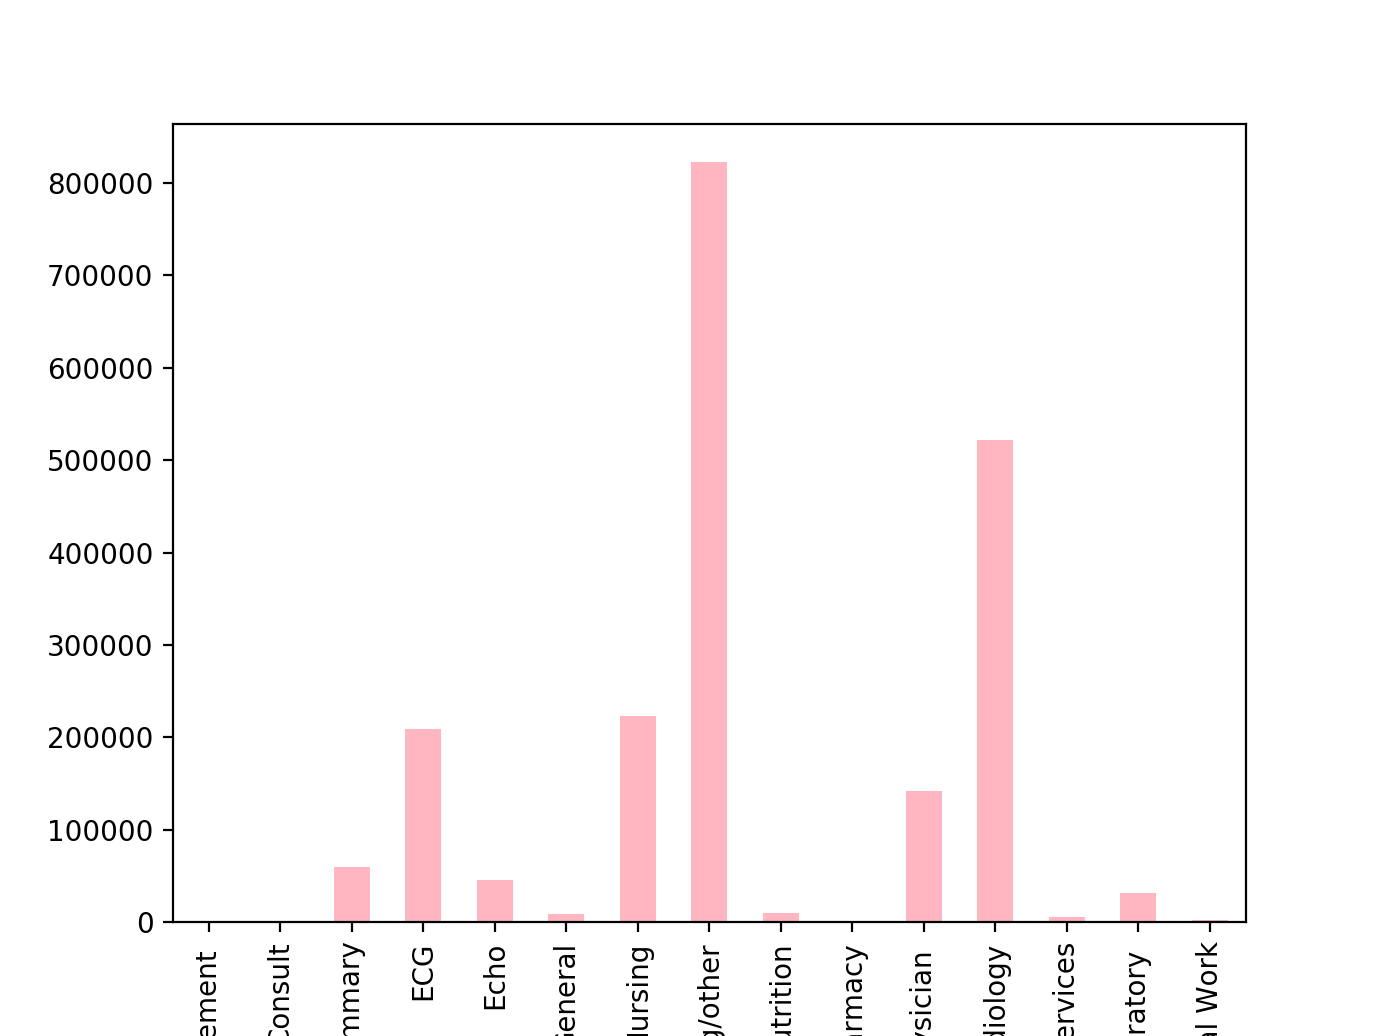

In [132]:
fig = plt.figure() 
df_notes.groupby(['CATEGORY']).size().plot.bar(color = 'lightpink')

In [133]:
df_notes.head()

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,174,22532,167853.0,2151-08-04,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2151-7-16**] Dischar...
1,175,13702,107527.0,2118-06-14,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2118-6-2**] Discharg...
2,176,13702,167118.0,2119-05-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2119-5-4**] D...
3,177,13702,196489.0,2124-08-18,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2124-7-21**] ...
4,178,26880,135453.0,2162-03-25,NaN,NaN,Discharge summary,Report,NaN,NaN,Admission Date: [**2162-3-3**] D...


In [134]:
df_notes.TEXT.iloc[0]

'Admission Date:  [**2151-7-16**]       Discharge Date:  [**2151-8-4**]\n\n\nService:\nADDENDUM:\n\nRADIOLOGIC STUDIES:  Radiologic studies also included a chest\nCT, which confirmed cavitary lesions in the left lung apex\nconsistent with infectious process/tuberculosis.  This also\nmoderate-sized left pleural effusion.\n\nHEAD CT:  Head CT showed no intracranial hemorrhage or mass\neffect, but old infarction consistent with past medical\nhistory.\n\nABDOMINAL CT:  Abdominal CT showed lesions of\nT10 and sacrum most likely secondary to osteoporosis. These can\nbe followed by repeat imaging as an outpatient.\n\n\n\n                            [**First Name8 (NamePattern2) **] [**First Name4 (NamePattern1) 1775**] [**Last Name (NamePattern1) **], M.D.  [**MD Number(1) 1776**]\n\nDictated By:[**Hospital 1807**]\nMEDQUIST36\n\nD:  [**2151-8-5**]  12:11\nT:  [**2151-8-5**]  12:21\nJOB#:  [**Job Number 1808**]\n'

In [135]:
df_notes.TEXT.iloc[1]

'Admission Date:  [**2118-6-2**]       Discharge Date:  [**2118-6-14**]\n\nDate of Birth:                    Sex:  F\n\nService:  MICU and then to [**Doctor Last Name **] Medicine\n\nHISTORY OF PRESENT ILLNESS:  This is an 81-year-old female\nwith a history of emphysema (not on home O2), who presents\nwith three days of shortness of breath thought by her primary\ncare doctor to be a COPD flare.  Two days prior to admission,\nshe was started on a prednisone taper and one day prior to\nadmission she required oxygen at home in order to maintain\noxygen saturation greater than 90%.  She has also been on\nlevofloxacin and nebulizers, and was not getting better, and\npresented to the [**Hospital1 18**] Emergency Room.\n\nIn the [**Hospital3 **] Emergency Room, her oxygen saturation was\n100% on CPAP.  She was not able to be weaned off of this\ndespite nebulizer treatment and Solu-Medrol 125 mg IV x2.\n\nReview of systems is negative for the following:  Fevers,\nchills, nausea, vomiting, nigh

In [136]:
df_notes.TEXT.iloc[2]

'Admission Date:  [**2119-5-4**]              Discharge Date:   [**2119-5-25**]\n\n\nService: CARDIOTHORACIC\n\nAllergies:\nAmlodipine\n\nAttending:[**Last Name (NamePattern1) 1561**]\nChief Complaint:\n81 yo F smoker w/ COPD, severe TBM, s/p tracheobronchoplasty [**5-5**]\ns/p perc trach [**5-13**]\n\nMajor Surgical or Invasive Procedure:\nbronchoscopy 3/31,4/2,3,[**6-12**], [**5-17**], [**5-19**]\ns/p trachealplasty [**5-5**]\npercutaneous tracheostomy [**5-13**] after failed extubation\ndown size trach on [**5-25**] to size 6 cuffless\n\n\nHistory of Present Illness:\nThis 81 year old woman has a history of COPD. Over the past five\n\nyears she has had progressive difficulties with her breathing.\nIn\n[**2118-6-4**] she was admitted to [**Hospital1 18**] for respiratory failure\ndue\nto a COPD exacerbation. Due to persistent hypoxemia, she\nrequired\nintubation and a eventual bronchoscopy on [**2118-6-9**] revealed marked\n\nnarrowing of the airways on expiration consistent with\ntr

In [137]:
df_notes.TEXT.iloc[3]

"Admission Date:  [**2124-7-21**]              Discharge Date:   [**2124-8-18**]\n\n\nService: MEDICINE\n\nAllergies:\nAmlodipine\n\nAttending:[**First Name3 (LF) 898**]\nChief Complaint:\nCOPD exacerbation/Shortness of Breath\n\nMajor Surgical or Invasive Procedure:\nIntubation\narterial line placement\nPICC line placement\nEsophagogastroduodenoscopy\n\n\nHistory of Present Illness:\n87 yo F with h/o CHF, COPD on 5 L oxygen at baseline,\ntracheobronchomalacia s/p stent, presents with acute dyspnea\nover several days, and lethargy. This morning patient developed\nan acute worsening in dyspnea, and called EMS. EMS found patient\ntachypnic at saturating 90% on 5L. Patient was noted to be\ntripoding. She was given a nebulizer and brought to the ER.\n.\nAccording the patient's husband, she was experiencing symptoms\nconsistent with prior COPD flares. Apparently patient was\nwithout cough, chest pain, fevers, chills, orthopnea, PND,\ndysuria, diarrhea, confusion and neck pain. Her husband i

In [138]:
df_notes.TEXT.iloc[4]

'Admission Date:  [**2162-3-3**]              Discharge Date:   [**2162-3-25**]\n\nDate of Birth:  [**2080-1-4**]             Sex:   M\n\nService: MEDICINE\n\nAllergies:\nPatient recorded as having No Known Allergies to Drugs\n\nAttending:[**First Name3 (LF) 1828**]\nChief Complaint:\nMr. [**Known lastname 1829**] was seen at [**Hospital1 18**] after a mechanical fall from\na height of 10 feet.  CT scan noted unstable fracture of C6-7 &\nposterior elements.\n\nMajor Surgical or Invasive Procedure:\n1. Anterior cervical osteotomy, C6-C7, with decompression and\nexcision of ossification of the posterior longitudinal ligament.\n2. Anterior cervical deformity correction.\n3. Interbody reconstruction.\n4. Anterior cervical fusion, C5-C6-C7.\n5. Plate instrumentation, C5-C6-C7.\n6. Cervical laminectomy C6-C7, T1.\n7. Posterior cervical arthrodesis C4-T1.\n8. Cervical instrumentation C4-T1.\n9. Arthrodesis augmentation with autograft, allograft and\ndemineralized bone matrix.\n\n\nHistory of 

In [139]:
df_notes_dis_sum = df_notes.loc[df_notes.CATEGORY == 'Discharge summary']

In [140]:
df_notes_dis_sum_last = (df_notes_dis_sum.groupby(['SUBJECT_ID','HADM_ID']).nth(-1)).reset_index()
assert df_notes_dis_sum_last.duplicated(['HADM_ID']).sum() == 0, 'Multiple discharge summaries per admission'

In [141]:
df_adm_notes = pd.merge(df_adm[['SUBJECT_ID','HADM_ID','ADMITTIME','DISCHTIME','DAYS_NEXT_ADMIT','NEXT_ADMITTIME','ADMISSION_TYPE','DEATHTIME']],df_notes_dis_sum_last[['SUBJECT_ID','HADM_ID','TEXT']], on = ['SUBJECT_ID','HADM_ID'],how = 'left')
assert len(df_adm) == len(df_adm_notes), 'Number of rows increased'

In [142]:
df_adm_notes.groupby('ADMISSION_TYPE').apply(lambda g: g.TEXT.isnull().sum())/df_adm_notes.groupby('ADMISSION_TYPE').size()

ADMISSION_TYPE
ELECTIVE     0.048663
EMERGENCY    0.037983
NEWBORN      0.536691
URGENT       0.042665
dtype: float64

In [143]:
df_adm_notes_clean = df_adm_notes.loc[df_adm_notes.ADMISSION_TYPE != 'NEWBORN'].copy()

In [144]:
print('Fraction of missing notes:', df_adm_notes_clean.TEXT.isnull().sum() / len(df_adm_notes_clean))
print('Fraction notes with newlines:', df_adm_notes_clean.TEXT.str.contains('\n').sum() / len(df_adm_notes_clean))
print('Fraction notes with carriage returns:', df_adm_notes_clean.TEXT.str.contains('\r').sum() / len(df_adm_notes_clean))

Fraction of missing notes: 0.03971592354195606
Fraction notes with newlines: 0.9602840764580439
Fraction notes with carriage returns: 0.0
